In [51]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler

In [43]:
#Load dataset
df= pd.read_csv(r'C:\Users\Henry Serrao\Downloads\energydata_complete.csv')

In [44]:
#Quick view about the dataset
df

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [45]:
df.shape

(19735, 29)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C511586F10>,
      dtype=object)

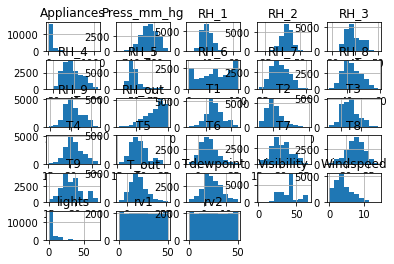

In [46]:
df.hist()

In [47]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [63]:
df = df.drop(['date','lights'], axis=1)

In [82]:
df.isna().sum()

Appliances     0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [49]:
#select a sample of the dataset
simple_linear_reg_df = df[['Appliances','T1']].sample(15,random_state=2)

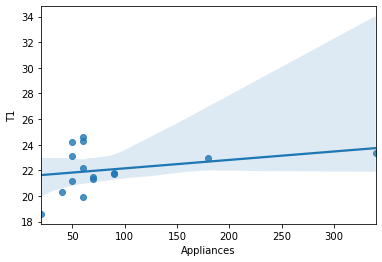

In [83]:
#regression plot
sns.regplot(x='Appliances',y='T1', data= simple_linear_reg_df)

In [65]:
#Firstly, we normalise our dataset to a common scale using the min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(df), columns= df.columns)
features_df = normalised_df.drop(columns= ['Appliances'])
target = normalised_df['Appliances']


In [92]:
#Now, we split our dataset into the training and testing dataset. Recall that we had earlier segmented the features and target variables.
X = df.drop('Appliances', axis =1)
Y = df['Appliances']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_df,target, test_size=0.33, random_state=42)

from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
reg = linear_model.fit(x_train, y_train)

In [93]:
reg.score(x_test, y_test)

0.14577919428593544

In [95]:
reg.score(x_train, y_train)

0.1456478297310978

In [69]:
#fit the model to the training dataset
linear_model.fit(x_train, y_train)
#obtain predictions
predicted_values = linear_model.predict(x_test)


In [96]:
reg.score(x_train, y_train)

0.1456478297310978

In [70]:
#MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 3) 

0.05

In [71]:
#R-squared 
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 3)

0.156

In [72]:
#Residual Sum of Squares
import numpy as np
rss = np.sum(np.square(y_test - predicted_values))
round(rss, 3)	

46.097

In [73]:
#Root Mean sqaure error
from sklearn.metrics import  mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3)

0.088

In [127]:
#comparing the effects of regularisation
from sklearn.linear_model import Lasso
lasso_reg =Lasso(alpha=0.4)
lasso_reg.fit(x_train, y_train)

from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.001)
ridge_reg.fit(x_train, y_train)


lasso_reg = Lasso(alpha=0.4)
lasso_reg.fit(x_train, y_train)



Lasso(alpha=0.4)

In [125]:
lasso_reg.score(x_train, y_train)

0.0

In [123]:
X = data[['T2']]
Y = data[['T6']]
from sklearn.metrics import r2_score
r2_score = r2_score(X, Y)
round(r2_score, 3)

-35.393

In [133]:
from sklearn.metrics import  mean_squared_error
rmse = np.sqrt(mean_squared_error(X, Y))
round(rmse, 3)

13.229

In [132]:
from sklearn.linear_model import Lasso
lasso_reg =Lasso(alpha=0.4)
lasso_reg.fit(X, Y)

from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.001)
ridge_reg.fit(X, Y)


lasso_reg = Lasso(alpha=0.4)
lasso_reg.fit(X, Y)

from sklearn.metrics import  mean_squared_error
rmse = np.sqrt(mean_squared_error(X, Y))
round(rmse, 3)

13.229

In [134]:
#comparing the effects of regularisation
def get_weights_df(model, feat, col_name):
  #this function returns the weight of every feature
  weights = pd.Series(model.coef_, feat.columns).sort_values()
  weights_df = pd.DataFrame(weights).reset_index()
  weights_df.columns = ['Features', col_name]
  weights_df[col_name].round(3)
  return weights_df